# Word2Vec

## Import dependencies

In [0]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import matplotlib.pyplot as plt

## Create word dict

In [0]:
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

In [0]:
word_seq = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w:i for i, w in enumerate(word_list)}

## Train

In [0]:
bs = 20
embedding_size = 2
voc_size = len(word_list)

In [0]:
def random_batch(data, size):
    rand_inputs = []
    rand_labels = []
    rand_index = np.random.choice(range(len(data)), size, replace=False)
    
    for i in rand_index:
        rand_inputs.append(np.eye(voc_size)[data[i][0]])
        rand_labels.append(data[i][1])
        
    return rand_inputs, rand_labels

In [0]:
skip_grams = []
for i in range(len(word_seq) - 1):
    target = word_dict[word_seq[i]]
    context = [word_dict[word_seq[i-1]], word_dict[word_seq[i+1]]]
    
    for w in context:
        skip_grams.append([target, w])

In [0]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        
        self.W = nn.Parameter(-2 * torch.rand(voc_size, embedding_size) + 1).type(torch.FloatTensor)
        self.WT = nn.Parameter(-2 * torch.rand(embedding_size, voc_size) + 1).type(torch.FloatTensor)
        
    def forward(self, x):
        hidden_l = torch.matmul(x, self.W)
        op_l = torch.matmul(hidden_l, self.WT)
        
        return op_l

In [0]:
model = Word2Vec()

In [0]:
criterion = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=0.001)

In [25]:
for epoch in range(5000):
    xb, yb = random_batch(skip_grams, bs)
    xb = Variable(torch.Tensor(xb))
    yb = Variable(torch.LongTensor(yb))
    
    opt.zero_grad()
    op = model(xb)
    loss = criterion(op, yb)
    
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', epoch + 1, 'Loss:', loss.item())
        
    loss.backward()
    opt.step()

Epoch: 1000 Loss: 1.6318743228912354
Epoch: 2000 Loss: 1.841606855392456
Epoch: 3000 Loss: 1.9308176040649414
Epoch: 4000 Loss: 1.59535813331604
Epoch: 5000 Loss: 1.6869070529937744


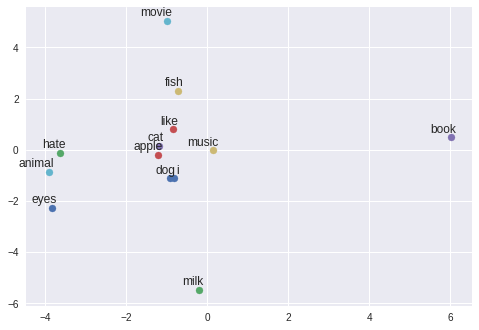

In [26]:
for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()